In [1]:
from google.colab import files
uploaded = files.upload()



Saving kickers.csv to kickers.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('kickers.csv')

columns_to_drop = df.columns[9:19]
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,Kicker Name,Team,Opponent,Home/Away,Stadium,Stadium Type,Fantasy Points,Wind
0,1,Younghoe Koo,ATL,NO,Home,Mercedes-Benz Stadium,Indoors,18,2
1,1,Cade York,CLE,CAR,Away,Bank of America Stadium,Outdoors,16,9
2,1,Chris Boswell,PIT,CIN,Away,Paycor Stadium,Outdoors,13,4
3,1,Greg Joseph,MIN,GB,Home,U.S. Bank Stadium,Indoors,13,5
4,1,Ryan Succop,TB,DAL,Away,AT&T Stadium,Indoors,13,6


In [5]:
df['Fantasy Points'] = pd.to_numeric(df['Fantasy Points'], errors='coerce')
df['Stadium Type'] = df['Stadium Type'].astype('category')
df['Home/Away'] = df['Home/Away'].astype('category')
df_filtered = df[['Stadium Type', 'Home/Away', 'Fantasy Points']]


In [6]:
# Group by Home/Away and calculate mean fantasy points
performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()
print(performance_by_home_away)


  Home/Away  Fantasy Points
0      Away        7.121212
1      Home        8.129032


<ipython-input-6-d1020dbaa44c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()


In [8]:
# Group by home away and calculate mean fantasy points
performance_by_stadium = df_filtered.groupby('Stadium Type')['Fantasy Points'].mean().reset_index()
print(performance_by_stadium)

  Stadium Type  Fantasy Points
0      Indoors        8.043478
1     Outdoors        7.365854


<ipython-input-8-614f4835d181>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_stadium = df_filtered.groupby('Stadium Type')['Fantasy Points'].mean().reset_index()


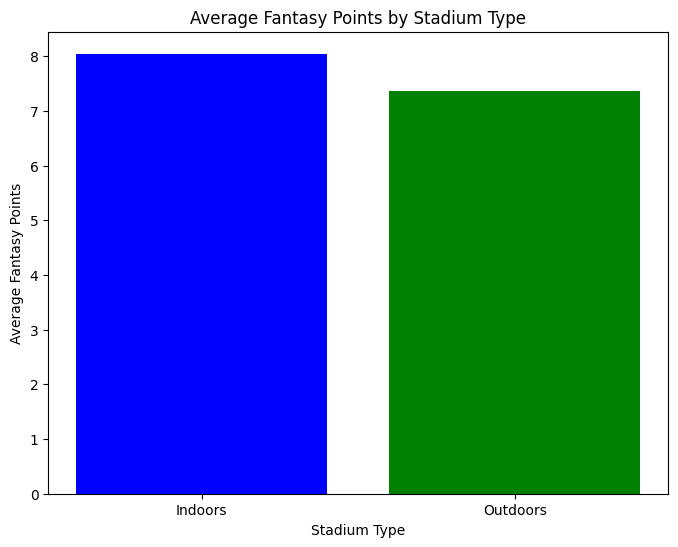

In [9]:


# Bar plot to compare performance
plt.figure(figsize=(8, 6))
plt.bar(performance_by_stadium['Stadium Type'], performance_by_stadium['Fantasy Points'], color=['blue', 'green'])
plt.xlabel('Stadium Type')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type')
plt.show()


<ipython-input-10-d7e81f64ff35>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()
<ipython-input-10-d7e81f64ff35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home/Away', y='Fantasy Points', data=performance_by_home_away, palette='viridis')


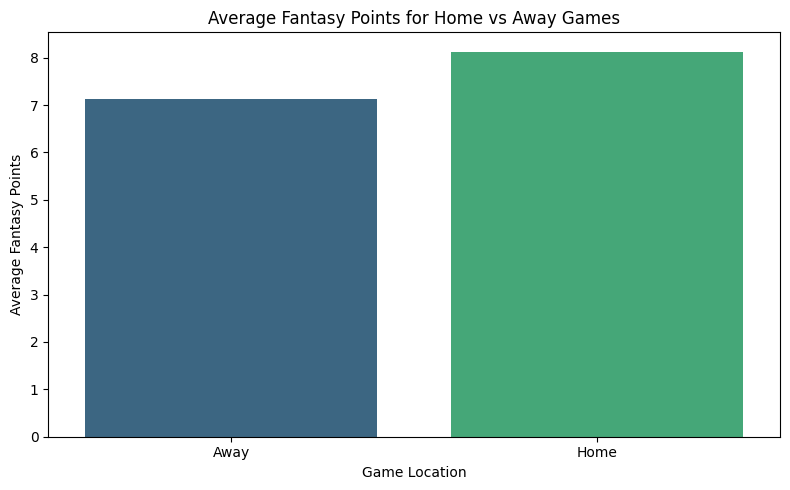

In [10]:

# Group by Home/Away and calculate mean fantasy points
performance_by_home_away = df_filtered.groupby('Home/Away')['Fantasy Points'].mean().reset_index()

# Create a bar plot for Home vs Away
plt.figure(figsize=(8, 5))
sns.barplot(x='Home/Away', y='Fantasy Points', data=performance_by_home_away, palette='viridis')
plt.xlabel('Game Location')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points for Home vs Away Games')
plt.tight_layout()
plt.show()


<ipython-input-11-9b7e21f7ae69>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_kicker_and_stadium = df.groupby(['Kicker Name', 'Stadium Type'])['Fantasy Points'].mean().reset_index()


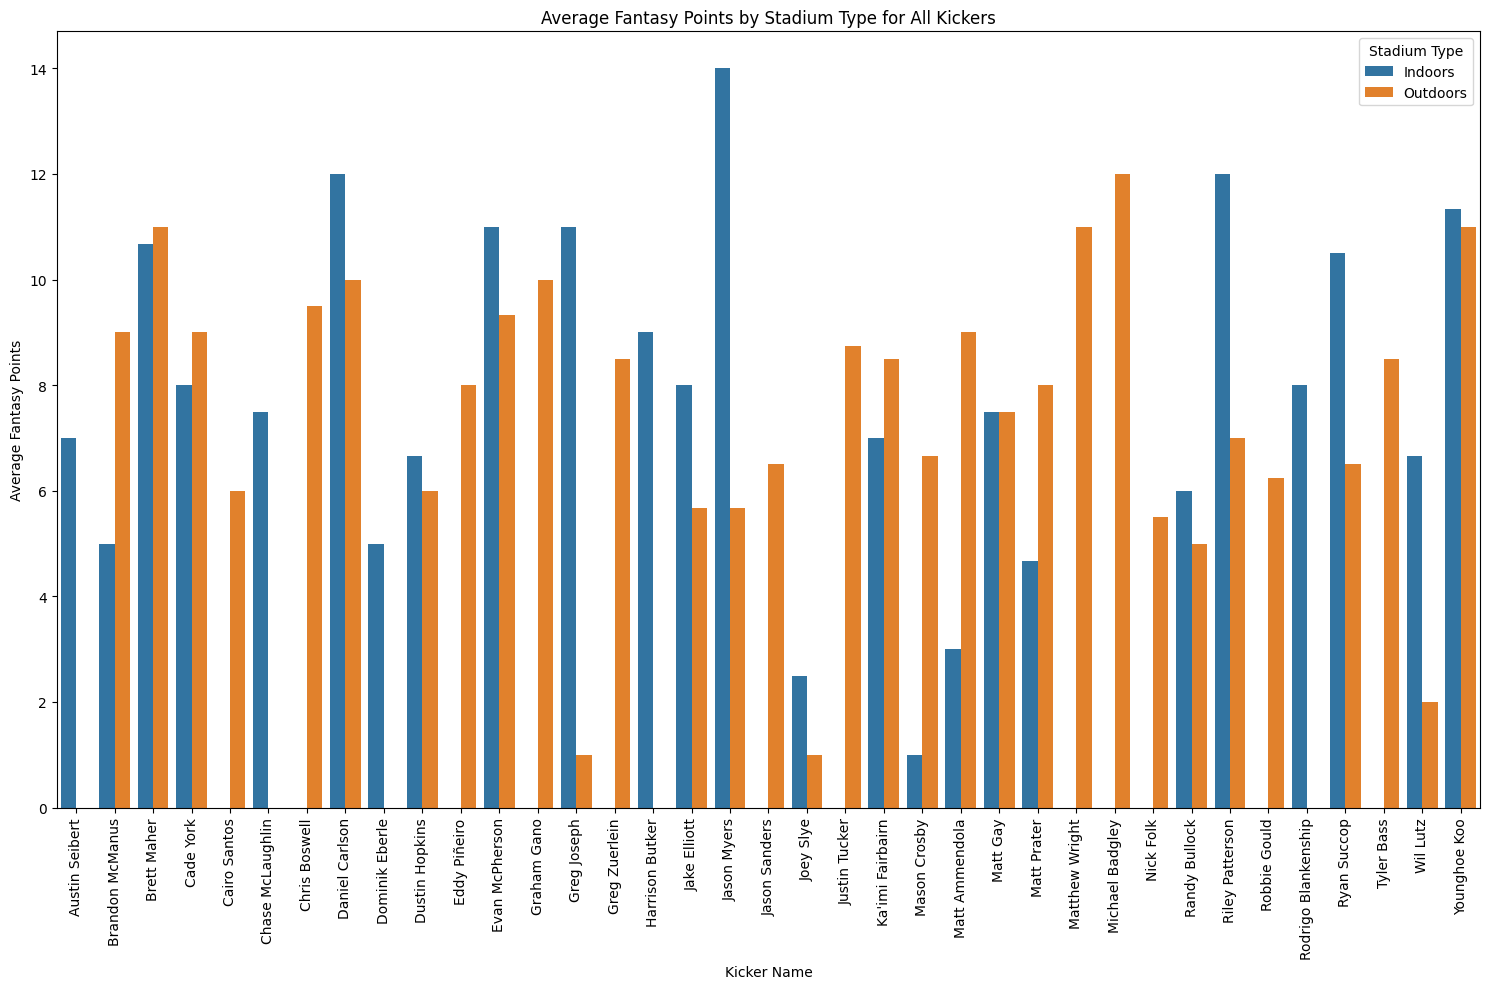

In [11]:


# Group by Kicker Name and Stadium Type, then calculate the mean Fantasy Points
performance_by_kicker_and_stadium = df.groupby(['Kicker Name', 'Stadium Type'])['Fantasy Points'].mean().reset_index()

# Create a bar plot for each kicker
plt.figure(figsize=(15, 10))
sns.barplot(x='Kicker Name', y='Fantasy Points', hue='Stadium Type', data=performance_by_kicker_and_stadium)
plt.xticks(rotation=90)
plt.xlabel('Kicker Name')
plt.ylabel('Average Fantasy Points')
plt.title('Average Fantasy Points by Stadium Type for All Kickers')
plt.legend(title='Stadium Type')
plt.tight_layout()
plt.show()



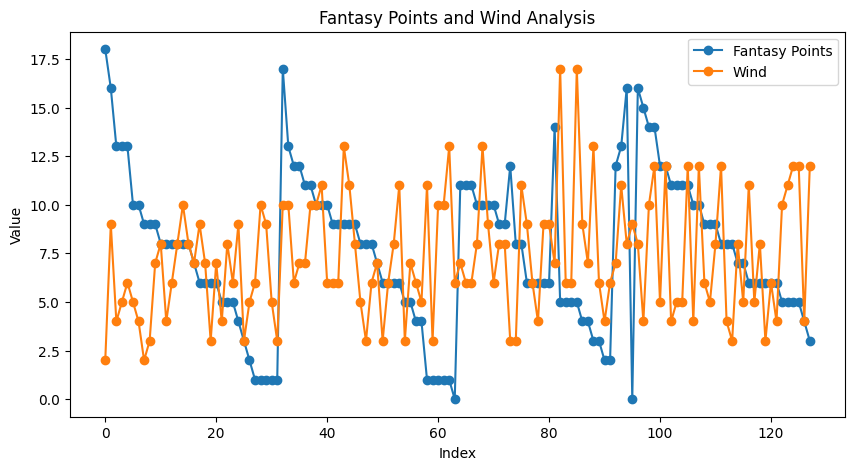

In [12]:


# Plot Fantasy Points vs Wind
plt.figure(figsize=(10, 5))
plt.plot(df['Fantasy Points'], label='Fantasy Points', marker='o')
plt.plot(df['Wind'], label='Wind', marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Fantasy Points and Wind Analysis')
plt.legend()

# Display the plot
plt.show()


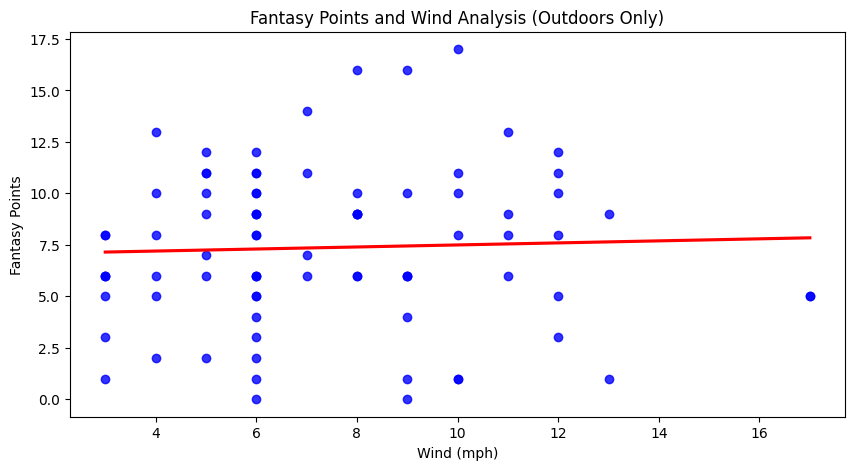

In [15]:


# Filter out indoor games
df_filtered = df[df['Stadium Type'] != 'Indoors']

# Create a scatter plot with a line of best fit
plt.figure(figsize=(10, 5))
sns.regplot(x='Wind', y='Fantasy Points', data=df_filtered, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Wind (mph)')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points and Wind Analysis (Outdoors Only)')

# Display the plot
plt.show()
